# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df.loc[hospital_read_df['Number of Discharges'] != 'Not Available',:]
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


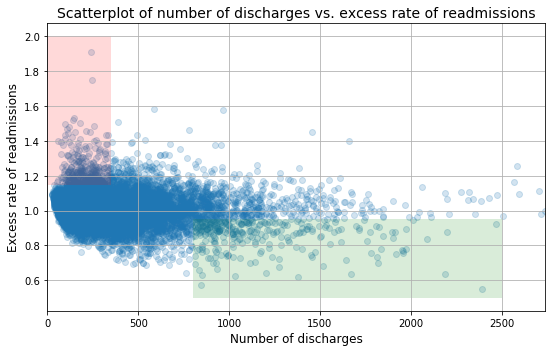

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Before jumping to questions, let us understand the dataset

In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.drop(['Provider Number','State','Measure Name','Footnote'],axis=1,inplace=True)

In [7]:
print(clean_hospital_read_df[['Start Date','End Date']].head(1))

       Start Date    End Date
16857  07/01/2010  06/30/2013


In [8]:
clean_hospital_read_df.nunique()

Hospital Name                 2921
Number of Discharges          1294
Excess Readmission Ratio      3564
Predicted Readmission Rate     264
Expected Readmission Rate      182
Number of Readmissions         354
Start Date                       1
End Date                         1
dtype: int64

### Answers: A. Do you agree with the analysis
**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is slightly trending down with increasing number of discharges.
+ It is implied that size of hospital is measured as number of discharges. Higher the number, higher the capacity.
+ Part A in the preliminary report talks wrt two shaded areas, whereas part B defines small and large in terms of number of discharges. The limits are different. Shaded area defines small as < 350, large as > 800, whereas part B defines small as < 100 and large as > 1000. Hence the report is confounding.
+ Whether we take limits as in part A or part B, the conclusions drawn do not represent the majority of samples.
We need to do statistical tests to get clearer idea.

In [9]:
df100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]
mean_readm_100 = df100['Excess Readmission Ratio'].mean()
readm_100_gt_1 = df100.loc[df100['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()*100/df100['Excess Readmission Ratio'].count()
df1000=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]
mean_readm_1000 = df1000['Excess Readmission Ratio'].mean()
readm_1000_gt_1 = df1000.loc[df1000['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()*100/df1000['Excess Readmission Ratio'].count()
print("Mean excess readmission rate for hospitals with discharges < 100: {} and there are {}% with readmission greater than 1".format(mean_readm_100,readm_100_gt_1))
print("Mean excess readmission rate for hospitals with discharges > 1000: {} and there are {}% with readmission greater than 1".format(mean_readm_1000,readm_1000_gt_1))

Mean excess readmission rate for hospitals with discharges < 100: 1.0226183501683506 and there are 63.215488215488215% with readmission greater than 1
Mean excess readmission rate for hospitals with discharges > 1000: 0.9783354211663071 and there are 44.49244060475162% with readmission greater than 1


### Answers: The following statistics are true
**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

### Part B of the Exercise:
Hypothesis Test:

H0 : The null hypothesis is that the excess readmission rate is uncorrelated with number of discharges

HA : The alternate hypothesis is that excess readmission rate is negatively correlated with number of discharges.

Let us have alpha = 0.01

Stated in plain English, we need to check if excess readmission rate for small hospitals and large hospitals come from same population (H0) or not (HA).

We will conduct a two sample hypothesis testing

In [10]:
df350 =  clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] <= 350]
df850 =  clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] >= 850]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


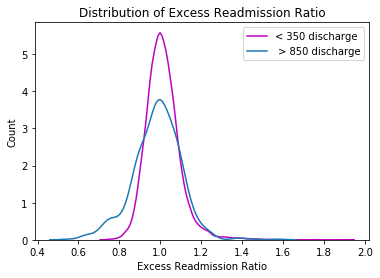

In [11]:
_ = sns.distplot(df350['Excess Readmission Ratio'],color='m',hist=False,label='< 350 discharge')
_ = sns.distplot(df850['Excess Readmission Ratio'],hist=False,label=' > 850 discharge')
_ = plt.title('Distribution of Excess Readmission Ratio')
_ = plt.ylabel('Count')
_ = plt.legend()

Actually without running any tests, I am inclined to conclude that there is no difference.

In [12]:
n2 = df850.shape[0]
n1 = df350.shape[0]
print("There are {} discharges from small hospitals and {} discharges from large hospitals".format(n1,n2))

There are 7090 discharges from small hospitals and 781 discharges from large hospitals


In [13]:
nh2 = df850['Hospital Name'].nunique()
nh1 = df350['Hospital Name'].nunique()
print("There are {} number of less than 350 discharge hospitals and {} number of more than 850 discharge hospitals".format(nh1,nh2))
num1 = len(set(df350['Hospital Name'].unique())-set(df850['Hospital Name'].unique()))
num2 = nh1-nh2
print('The unique hospital names with < 350 discharge, which are not in > 850 discharge:',num1)
print('The difference in the number of records in two sets of samples:',num2)

There are 2592 number of less than 350 discharge hospitals and 417 number of more than 850 discharge hospitals
The unique hospital names with < 350 discharge, which are not in > 850 discharge: 2405
The difference in the number of records in two sets of samples: 2175


There are overlapping members in two sets of samples, otherwise in place of 2405, we should have got 2175. Under this conditions, we can not do a hypothesis test. Let us see, if this is the case with less than 100 and more than 1000 case

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


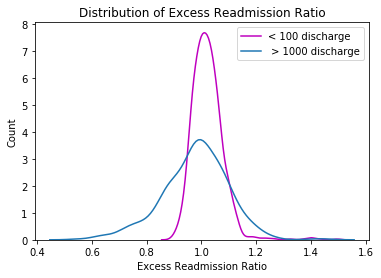

In [14]:
_ = sns.distplot(df100['Excess Readmission Ratio'],color='m',hist=False,label='< 100 discharge')
_ = sns.distplot(df1000['Excess Readmission Ratio'],hist=False,label=' > 1000 discharge')
_ = plt.title('Distribution of Excess Readmission Ratio')
_ = plt.ylabel('Count')
_ = plt.legend()

In [15]:
nh2 = df100['Hospital Name'].nunique()
nh1 = df1000['Hospital Name'].nunique()
print("There are {} number of less than 100 discharge hospitals and {} number of more than 1000 discharge hospitals".format(nh1,nh2))
num1 = len(set(df100['Hospital Name'].unique())-set(df1000['Hospital Name'].unique()))
num2 = nh1-nh2
print('The unique hospital names with < 100 discharge, which are not in > 1000 discharge:',num1)
print('The difference in the number of records in two sets of samples:',num2)

There are 281 number of less than 100 discharge hospitals and 971 number of more than 1000 discharge hospitals
The unique hospital names with < 100 discharge, which are not in > 1000 discharge: 964
The difference in the number of records in two sets of samples: -690


The above also makes no sense. Hence we can not conduct a two sample test. But let's say we go ahead blindly, as required by the exercise. Let's take < 350 and > 850 samples

Assumption verification:
a) Records are independent
b) Sample size are much greater than 30. The distributions are nearly normal
Less than 10% of population
 Central limit theorem can be applied. 

In [16]:
mean1 = df350['Excess Readmission Ratio'].mean()
mean2 = df850['Excess Readmission Ratio'].mean()
var1 = df350['Excess Readmission Ratio'].var()
var2 = df850['Excess Readmission Ratio'].var()
arr = np.round(np.array([mean1,mean2,var1,var2]),4)
print('Mean350  Mean850  Var350  Var850')
print(arr)

Mean350  Mean850  Var350  Var850
[ 1.0133  0.9844  0.007   0.0139]


In [17]:
zscore = (mean1 - mean2)/np.sqrt((var1/n1) + (var2/n2))
print("Z-score:",zscore)

Z-score: 6.66103760921


**Since Z-score is so high at 6.66, the p-value would be nearly 0, we reject the null hypothesis in favor of alternate hypothesis**

We come to the above false conclusion even though < 350 and > 850 sets looked the same.

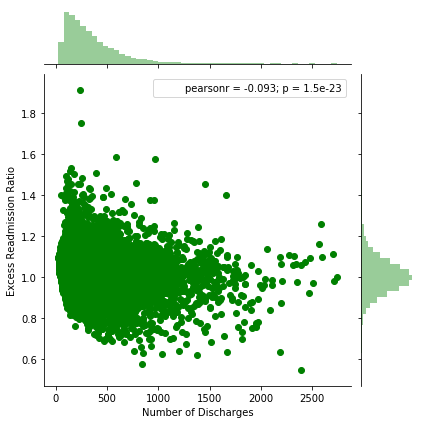

In [18]:
# We can do a joint plot to see the histograms of both at the same time
_ = sns.jointplot(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3],color='g')

### Answers: 
4.Examining the original conclusions:

**C. Conclusions**

- This exercise is hard to interpret. Ignore the rest of what is written here

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
-This is true for hospitals with number of discharges <= 350. The excess readmission rate peak occurs somewhere to the left of x axis value 350.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

-This is a good recommendation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

-This may be an overkill and it will not drastically bring down the excess admission rate. In fact, the findings of this study are insufficient to forecast what additional issues might pop up while consolidating smaller hospitals.

5.Looking at the original scatterplot given and commenting:

The given scatterplot does not have a single line / value information on how the two quantities are correlated. There is no visibility on how dense or sparse the points are. This can be solved with jointplot, which gives information on histograms of each quantities and also how a regression line fits through the scatterplot. 